In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from smstools.models import stochasticModel as STC
from smstools.models import utilFunctions as UF
from smstools.transformations import stochasticTransformations as STCT

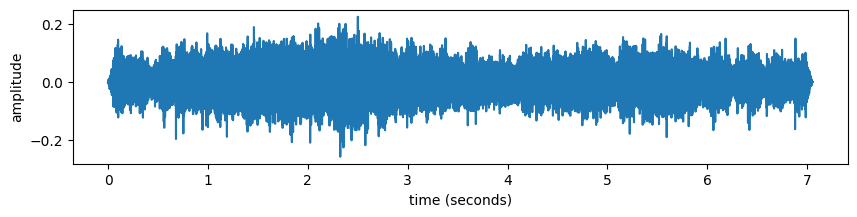

In [3]:
inputFile = "../sounds/rain.wav"
fs, x = UF.wavread(inputFile)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x.size/fs, x.size)
plt.plot(time_indexes, x)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))

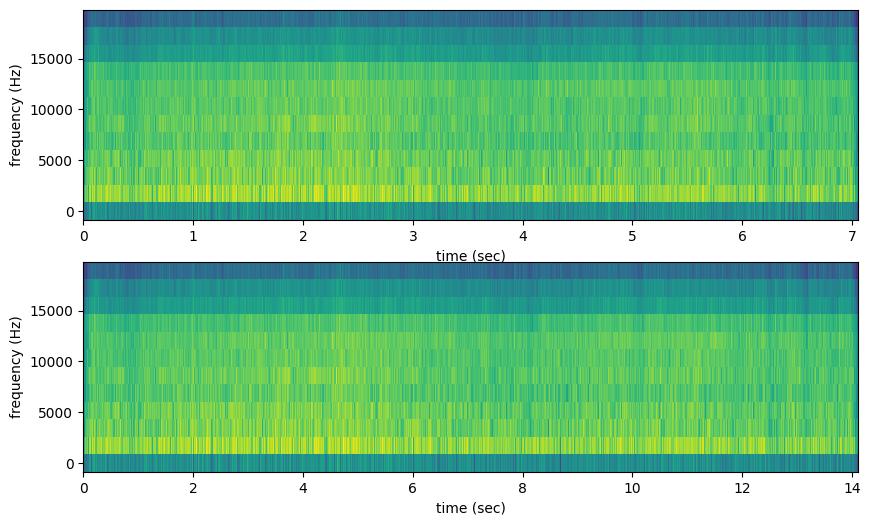

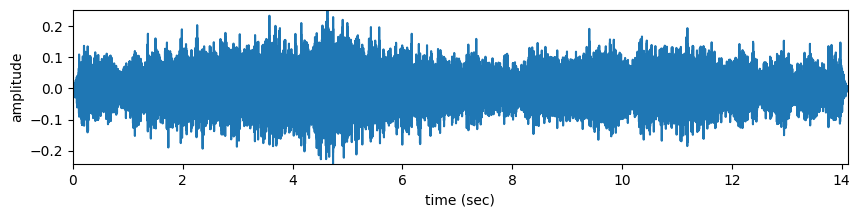

In [4]:
stocf=0.1
timeScaling=np.array([0, 0, 1, 2])

# hop size
H = 128
# perform stochastic analysis
mYst = STC.stochasticModelAnal(x, H, H * 2, stocf)
# perform time scaling of stochastic representation
ystocEnv = STCT.stochasticTimeScale(mYst, timeScaling)
# synthesize output sound
y = STC.stochasticModelSynth(ystocEnv, H, H * 2)

# create figure to plot
plt.figure(figsize=(10, 6))

# plot stochastic representation
plt.subplot(2, 1, 1)
numFrames = int(mYst[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
binFreq = np.arange(int(stocf * H)) * float(fs) / (stocf * 2 * H)
plt.pcolormesh(frmTime, binFreq, np.transpose(mYst))
plt.autoscale(tight=True)
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")

# plot modified stochastic representation
plt.subplot(2, 1, 2)
numFrames = int(ystocEnv[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
binFreq = np.arange(int(stocf * H)) * float(fs) / (stocf * 2 * H)
plt.pcolormesh(frmTime, binFreq, np.transpose(ystocEnv))
plt.autoscale(tight=True)
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.show()

# plot the output sound
plt.figure(figsize=(10, 2))
plt.plot(np.arange(y.size) / float(fs), y)
plt.axis([0, y.size / float(fs), min(y), max(y)])
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.show()
ipd.display(ipd.Audio(data=y, rate=fs))